# Cleveland Heart Disease Database
Heart disease is the leading cause of death worldwide.
I hope to surpass the previous result of 78% accuracy which I did using commonly used classification algorithms. Both xgboost and logistic regression exceeded 84% accuracy using cross-validation.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## read data and name columns
num is the target variable, 
goal: 77% accuracy for classification
predictors
age: in years
sex: 0=female, 1 = male
cp: chest pain: 1 = typical angina, 2 = atypical nagina, 3 = non-anginal pain, 4 = asympotomatic. Agnina is a temporary lack of oxygen rich blood to the heart
trestbps: resting blood pressure (mmHg upon admission to hospital)
chol: serum cholestoral (mg/dl)
fbs: fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
restecg: resting electrocariographic results: 0 = normal, 1 = St-T wave abnormality, 2 = Probable left ventricular hypertrophy by Estes' criteria
thalach: max heart rate
exang: exercise enduced angina (1 = yes, 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
ca: number of major vessels (0-3)
thal: 3 = normal, 6 = fexed defect, 7 = reversable defect
num: presence of heart disease (angiographic disease status)
0 : <50% diameter narrowing
1: >50% diameter narrowing
0: no presence of heart disease, 1,2,3,4: presence

In [153]:
data = pd.read_csv('/home/kevin/Downloads/data/heart_disease_processed.cleveland.txt', header=None, na_values = '?' )
#they denoted ? as unknown so we replace these with np.NaNs and remove them later on
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data.columns = columns

In [154]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [182]:
data['num'] = data['num'].replace([2,3,4], 1)#only care about heart disease or not

In [183]:
len(data)

297

In [184]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

## Data Cleaning
Need to convert string (objects) to a numeric datatype to allow for input into machine learning algorithms. I converted ? marks to NaNs, but now we need to drop the NaNs

In [185]:
data = data.dropna()

In [186]:
data.shape

(297, 14)

## Visualization

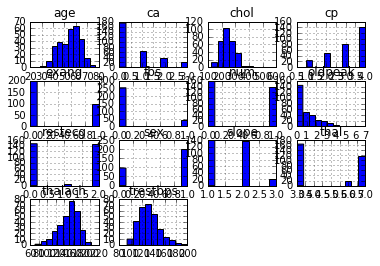

In [187]:
data.hist()
plt.show()

## Train-test split
I don't think I really need dimensionality reduction since there are only 13 features.

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X = np.asmatrix(data[columns[:-1]])
y = list(data[columns[-1]])

In [190]:
X.shape, len(y)

((297, 13), 297)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state = 1)

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [194]:
pred1 = clf.predict(X_test)

In [195]:
score = sum(pred1 == y_test)/len(y_test)

In [196]:
score

0.84999999999999998

## GridSearchCV 

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

### SVC

In [231]:
parameters = {'kernel': ('linear', 'rbf'), 'C': [.005,.01,.05,.1,1]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)

In [232]:
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.005, 0.01, 0.05, 0.1, 1], 'kernel': ('linear', 'rbf')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [233]:
clf.best_params_, clf.best_score_

({'C': 0.05, 'kernel': 'linear'}, 0.84511784511784516)

### Logistic Regression

In [234]:
parameters = {'C': [.1,.25,.5,.75,1,5,10]}
clf = LogisticRegression()
clf = GridSearchCV(clf, parameters)
clf.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [235]:
clf.best_score_, clf.best_params_

(0.84175084175084181, {'C': 0.5})

### XGBoost

In [252]:
import xgboost
parameters2 = {'colsample_bytree': 0.5,
  'learning_rate': 0.01,
  'max_depth': 2,
  'n_estimators': 750,
  'reg_alpha': 0.001,
  'reg_lambda': 2}
clf = xgboost.XGBClassifier(**parameters2)
#parameters = {'max_depth':[2,3,4], 'learning_rate':[.001,.005, .01,.05,.1], 'n_estimators':[500,750, 1000], 'reg_lambda': [1,2,5,10], 'reg_alpha': [0, .001], 'colsample_bytree': [.5, 1]}
#clf = GridSearchCV(clf)#, parameters2)
pred = clf.fit(X_train,y_train)

In [253]:
score = sum(pred1 == y_test)/len(y_test)
print(score)

0.85


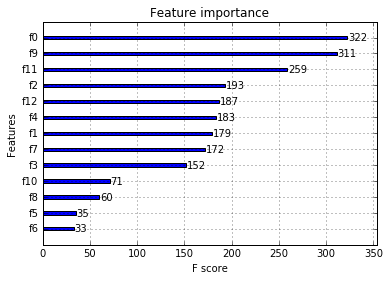

In [254]:
xgboost.plot_importance(clf)